<a href="https://colab.research.google.com/github/KodaliSuchitraKamala/Support_Vector_and_Gradient_Descent-Regressions/blob/main/Program9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Load California Housing Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

In [ ]:
# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [ ]:
# Step 5: Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
# Scale y for SVR only
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr = sc_y.inverse_transform(svr.predict(X_test_scaled).reshape(-1, 1)).flatten()

In [ ]:
# Step 6: Custom Gradient Descent Linear Regression
class GradientDescentRegressor:
  def __init__(self, learning_rate=0.001, epochs=3000):
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self, X, y):
    X = np.c_[np.ones(X.shape[0]), X] # Add bias column
    self.theta = np.zeros(X.shape[1])
    m = len(y)
    for _ in range(self.epochs):
      y_pred = X @ self.theta
      error = y_pred - y
      gradient = (1/m) * (X.T @ error)
      self.theta -= self.lr * gradient
  def predict(self, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ self.theta

In [ ]:
# Train Gradient Descent Linear Regressor (on scaled X, raw y)
gd_reg = GradientDescentRegressor(learning_rate=0.001, epochs=3000)
gd_reg.fit(X_train_scaled, y_train.values)
y_pred_gd = gd_reg.predict(X_test_scaled)

In [ ]:
# Step 7: Evaluate both models
print("=== Support Vector Regression ===")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))

=== Support Vector Regression ===
MSE: 0.35415096003813135
R2 Score: 0.7297401300519586


In [ ]:
print("\n=== Gradient Descent Linear Regression ===")
print("MSE:", mean_squared_error(y_test, y_pred_gd))
print("R2 Score:", r2_score(y_test, y_pred_gd))


=== Gradient Descent Linear Regression ===
MSE: 0.6300654262693889
R2 Score: 0.5191841350818641


In [ ]:
# Step 8: Plot predictions
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

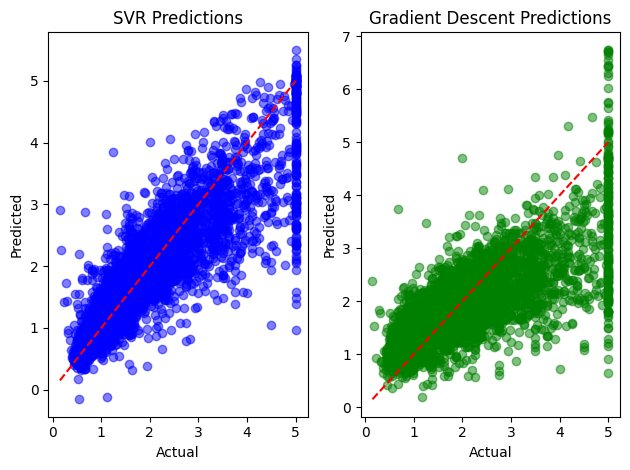

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Predictions')

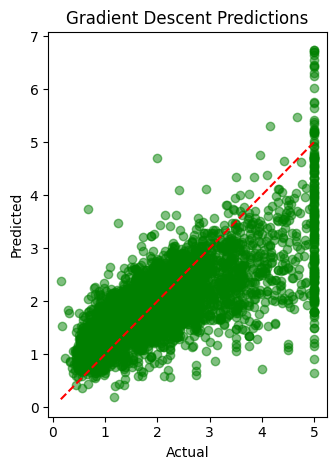

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gd, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Descent Predictions')
plt.tight_layout()
plt.show()